___
# <center> XGBoost Classification
<center> XGBoost was designed to be used with large complex datasets
$$$$
<center> Gareth Bayvel
    
___

___
## <center> Building XGBoost Forest
___
    
**Step One**:
    
1. XGBoost starts by making an initial prediction (single leaf) which by default is usually 0.5.
    
    
2. Whether we use XGBoost for Classification or Regression our initial prediction is 0.5.
    
    
3. This Initializes our Model with a constant value (Initial Leaf).

**Step Two**:    
    
1. Calculate the residuals (pseudo-residuals) between our actual observations and our predicted value (initial prediction).
  
    
2. Fit a regression tree to the residuals (pseudo-residuals) for each Tree we construct.
  
    
3. XGBoost uses unique regression trees by calculating the similarity score at each node and splitting based upon largest gain. 
    
    
4. Prune the tree based upn a gamma value as a threshold
    
    
5. Calculate the output values of each leaf.
 
    
4. Make a New Prediction for each sample and Update residuals accordingly

**Step Three**:
1. Repeat the above steps.
    
    
2. Our second tree is built based on the residual errors of the first tree.

___
# <center> XGBoost Unique Tree algorithm for calculating Similarity Score
       
___
___

#### <center> To solve any supervised Machine Learning problem, given the dataset:
    
$$\{(x_i,y_i\}_{i=1}^{n}$$

#### <center> And a Differential Loss Function:
$$L(y,f)$$

___ 
#### <center> We are trying to find the optimal output value for the leaf than minimize our differentiable loss function:


$$[\sum_{i=1}^{n}L(y_i,p_i)] + \frac{1}{2}\lambda O^2_{\text{value}}$$

___
## <center> Intuition

___
#### <center> Junior Data Scientist Salary Expectation DataSet: $\{(x_i,y_i\}_{i=1}^{n}$
$$\begin{array}{c|c}
   \text{Salary Expectation} & \text{Hired}\\
  \hline
  $30,000  & \text{No} \\ 
  \hline
   $65,000 & \text{Yes} \\  
  \hline
  $75,000 & \text{Yes} \\
  \hline
  $100,000 & \text{No} 
 \end{array}$$  


___
## <center> Initial Prediction is 0.5

<center> When we use Gradient Boosting for Classification or Regression the initial Prediction by default is 0.5
    
___
    
$$\begin{array}{c|c}
   \text{Salary Expectation} & \text{Hired}& \text{Prediction} \\
  \hline
  $30,000  & \text{No} & 0.5\\ 
  \hline
   $65,000 & \text{Yes}& 0.5 \\  
  \hline
  $75,000 & \text{Yes}& 0.5 \\
  \hline
  $100,000 & \text{No} & 0.5
 \end{array}$$  

___
## <center> Initial Prediction Accuracy Through Pseudo-Residuals
<center> We can measure how bad our initial Prediction is by calculating the pseudo-residuals, the difference between the observed and predicted.

___
$$\text{Residuals} = (\text{Observed - Predicted})$$
___

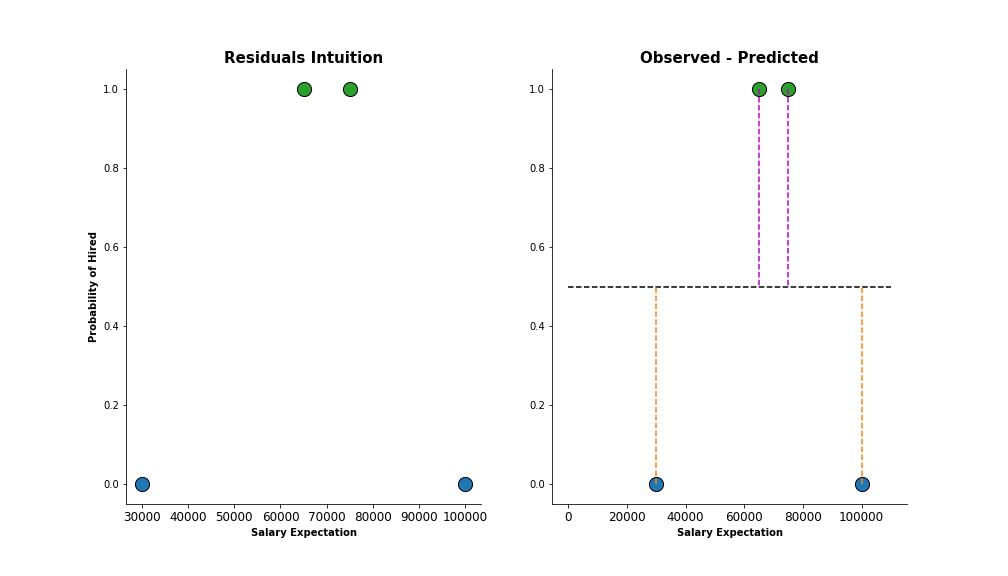

In [23]:
Image('XGBoostClassificationInitial.png')

___
### <center> Residuals for the leaf's Initial Prediction
___

#### <center> Junior Data Scientist Salary Expectation DataSet
$$\begin{array}{c|c}
   \text{Salary Expectation} & \text{Hired}& \text{Prediction} & \text{Residuals} \\
  \hline
  $30,000  & \text{No} & 0.5 & -0.5\\ 
  \hline
   $65,000 & \text{Yes}& 0.5 & 0.5\\  
  \hline
  $75,000 & \text{Yes}& 0.5 & 0.5\\
  \hline
  $100,000 & \text{No} & 0.5 & -0.5
 \end{array}$$  

___
#### <center> We are trying to find the optimal output value for the leaf than minimize our differentiable loss function:


$$[\sum_{i=1}^{n}L(y_i,p_i)] + \frac{1}{2}\lambda O^2_{\text{value}}$$
___
    
## <center> Taylor Series Approximation

<center> Taylor series are extremely powerful tools for approximating functions that can be difficult to otherwise compute. 
    
___    
#### <center> Finding polynomials that approximate a function   
<center> A Taylor series approximation uses Taylor series to represent a number as a polynomial that very closely approximates the value of a specified $x$ value. Taking non-polynomial functions and finding polynomials that approximate them near some $x$ value.
    
___    
#### <center> Why Use Polynomials    
<center> Polynomials tend to be easier to deal with than others functions as they are easier to compute and take derivatives

___
#### <center> Easiest Illustration is $e^x$ around the value $x=0$

$$\frac{d}{dx} = e^x$$

___
#### <center> At Point x is zero
    
$$e^0 = 1$$
___
    
#### <center> Polynomial Approximation of $e^x$ 

$$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots $$
___
$$f(x) = 1 + 1\frac{x}{1!}+ 1\frac{x^2}{2!} + 1\frac{x^3}{3!}+ \cdots $$

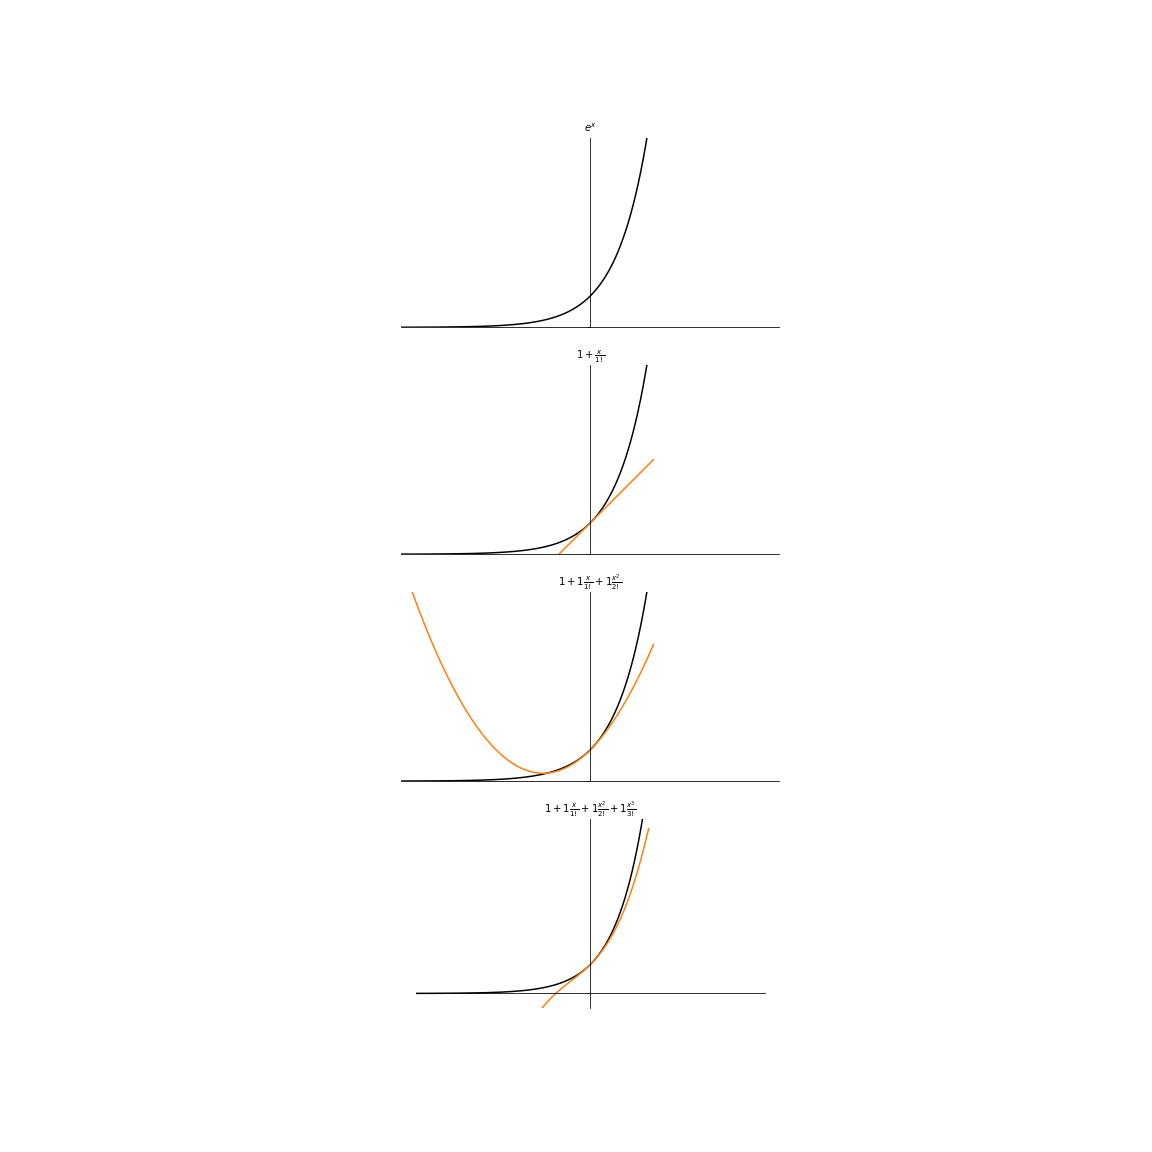

In [3]:
Image('TaylorPoly.png')

___
#### <center> Second Order Taylor Approximation to solve for Optimal Output Value    
    
$$L(y_i,p_i+O_{\text{value}}) \approx L(y_i,p_i) + [\frac{d}{dp_i}L(y_i,p_i)]O_{\text{value}} + \frac{1}{2}[\frac{d^2}{d^2p_i}L(y_i,p_i)]O_{\text{value}}^2$$ 
    
$$g = [\frac{d}{dp_i}L(y_i,p_i)]$$
    
 
$$h = [\frac{d^2}{d^2p_i}L(y_i,p_i)]$$
___    
$$L(y_i,p_i+O_{\text{value}}) \approx L(y_i,p_i) +gO_{\text{value}} + \frac{1}{2}hO_{\text{value}}^2$$ 
  
___
#### <center> Ouptut Value that minimizes the Loss Function plus Regularization
$$ L(y_1,p_1^0) +g_1O_{\text{value}} + \frac{1}{2}h_1O_{\text{value}}^2 \nonumber \\ \qquad {}  + L(y_2,p_2^0) +g_2O_{\text{value}} + \frac{1}{2}h_2O_{\text{value}}^2\nonumber + \cdots +\nonumber \\ \qquad {} + L(y_n,p_n^0) +g_nO_{\text{value}} + \frac{1}{2}h_nO_{\text{value}}^2 + \frac{1}{2}\lambda O^2_{\text{value}}$$ 
    
___
#### <center> Terms associated with $O_{\text{value}}$
    
$$ g_1O_{\text{value}} + \frac{1}{2}h_1O_{\text{value}}^2 \nonumber \\ \qquad {}  + g_2O_{\text{value}} + \frac{1}{2}h_2O_{\text{value}}^2\nonumber + \cdots +\nonumber \\ \qquad {} +g_nO_{\text{value}} + \frac{1}{2}h_nO_{\text{value}}^2 + \frac{1}{2}\lambda O^2_{\text{value}}$$ 
 
___
#### <center> Combine Like Terms 
$$(g_1 + g_2 +\cdots + g_n)O_{\text{value}} + \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)O^2_{\text{value}}$$
    
___   
#### <center> Taking Derivative with respect to $O_{\text{value}}$
    
$$\frac{d}{dO_{\text{value}}} = (g_1 + g_2 +\cdots + g_n)+(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}} = 0$$
    
___   
#### <center>Solve for $O_{\text{value}}$
    
$$(g_1 + g_2 +\cdots + g_n)+(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}}$$
$$$$ 
$$(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}} = -(g_1 + g_2 +\cdots + g_n)$$
    
___    
$$O_{\text{value}} = \frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$ 
    
___    
#### <center> Similarity Score
$$-(g_1 + g_2 +\cdots + g_n)O_{\text{value}} - \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)O^2_{\text{value}}$$
$$$$    
    
$$-(g_1 + g_2 +\cdots + g_n)\frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)} - \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)[\frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)}]^2$$
    
$$$$    
$$\frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)} - \frac{1}{2}\frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$   
    
___  
$$\text{Similarity Score} = \frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$

___   
### <center> A Loss Function:
$$\text{log(likelihood) of observed data given prediction} = \sum_{i=1}^{m}y_{i}log(p)+(1-y_i)log(1-p)$$

___
### <center> Goal is to Maximize log Likelihood
    
<center> If we want to use the log likelihood as a Loss Function its better to use the negative log likelihood instead
    
___
$$-\sum_{i=1}^{m}y_{i}log(p_i)+(1-y_i)log(1-p_i)$$
    
___    
#### <center> In terms of our Data
$$-[y_i\times log(p_i)+(1-y_i)log(1-p_i)]$$    
___
**Step One:**
    
$$-y_i\times log(p_i)-(1-y_i)log(1-p_i)$$    
___
**Step Two:**
$$-(1-y_i)log(1-p_i) = -log(1-p_i) + y_i \times log(1-p_i)$$
    
    
$$-y_i\times -log(1-p_i) + y_i \times log(1-p_i)$$  
___
**Step Three:**
    
$$-y_i\times [log(p_i)-log(1-p_i)] - log(1-p_i)$$   
    
___
**Step Four:**
$$[log(p_i)-log(1-p_i)] = \frac{log(p_i)}{log(1-p_i)} = log\frac{p_i}{1-p_i} = log(odds)$$
    
    
$$-y_i\times log(odds) - log(1-p_i)$$  
    
___
**Step Five:**
$$log(1-p_i) = -log(1+e^{log(odds)}) $$
___   
### <center> Loss Function 
$$-y_i\times log(odds) + log(1+e^{log(odds)})$$  
    
___
### <center> A Differentiable Loss Function:
#### <center> Partial Derivative w.r.t log(odds)
    
$$\frac{\partial L}{\partial \text{log(odds)}} = -y_i\times log(odds) + log(1+e^{log(odds)})$$
___
**First Part**
$$\frac{\partial L}{\partial \text{log(odds)}} = -y_i\times log(odds)$$

$$= -y_i$$
    
___
**Second Part**
$$\frac{\partial L}{\partial \text{log(odds)}} = -log(1+e^{log(odds)})$$
___
**Using the Chain Rule**
$$\frac{\partial L}{\partial \text{log(odds)}} = \frac{1}{1+e^{log(odds)}} \times e^{log(odds)}  = \frac{e^{log(odds)}}{1+e^{log(odds)}}$$
___
## <center> Partial Derivative w.r.t log(odds)    
    
$$\frac{\partial L}{\partial \text{log(odds)}} = -y_i+ \frac{e^{log(odds)}}{1+e^{log(odds)}}$$
$$$$  
    
$$\frac{\partial L}{\partial \text{log(odds)}} = -(y_i+ p_i)$$  
    
$$$$     
$$g_i = -(y_i+ p_i)$$      
___
    
## <center> Partial Second Derivative w.r.t log(odds)    
    
$$\frac{\partial'' L}{\partial'' \text{log(odds)}} = \frac{e^{log(odds)}}{1+e^{log(odds)}} \times  \frac{1}{1+e^{log(odds)}}$$
$$$$  
    
$$\frac{\partial'' L}{\partial'' \text{log(odds)}} = p_i\times(1- p_i)$$    
    
$$$$     
$$h_i = p_i\times(1- p_i)$$       
___    
    
#### <center>Solve for $O_{\text{value}}$
  
$$O_{\text{value}} = \frac{-(-(y_i-p_i) + -(y_i-p_i) +\cdots + -(y_i-p_i))}{(p_i\times(1- p_i) + p_i\times(1- p_i) +\cdots +\lambda)}$$  
$$$$  
$$O_{\text{value}} = \frac{\sum{}{}\text{$Residual_i$}}{\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]+\lambda}$$    
___
#### <center> Similary Score for Residuals
    
$$\text{Similary Score For Residuals} =\frac{(\sum{}{}\text{$Residual_i$})^2}{\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]+\lambda}$$    
    $$$$
$$\text{Regularization Parameter} =\lambda$$    

___
#### <center> B. Fit a regression tree to the Residual values
We will build our tree using our Salary Expectation to predict the **residuals**. 
    
1. XGBoost uses unique regression trees by calculating the similarity score at each node and splitting based upon largest gain.
    
    
2. For illustration purposes we will restrict our max_depth to 2
    
    
3. XGBoost has a minimum numbers of residuals in each leaf which is calculated using **Cover**  
    
___
#### <center> All residuals in intial leaf
    
$$\begin{bmatrix}
      -0.5 & 0.5 & 0.5 & -0.5
     \end{bmatrix}$$
    
___    
#### <center> Calculate Similary Score for Residuals
    
$$\text{Similary Score For Residuals} =\frac{(\sum{}{}\text{$Residual_i$})^2}{\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]+\lambda}$$    
     $$$$
$$\text{Regularization Parameter} =\lambda$$   
___
#### <center> Setting our Regularization Parameter to zero
$$\text{Similary Score For Residuals} = \frac{(-0.5 + 0.5 + 0.5 + -0.5)^2}{3\times(0.5 \times (1 - 0.5))}$$       
$$$$
$$\text{Similary Score For Residuals} = \frac{(0)^2}{4\times(0.5 \times (1 - 0.5))} = 0$$    
    
___
### <center> Clustering similar residuals into two groups

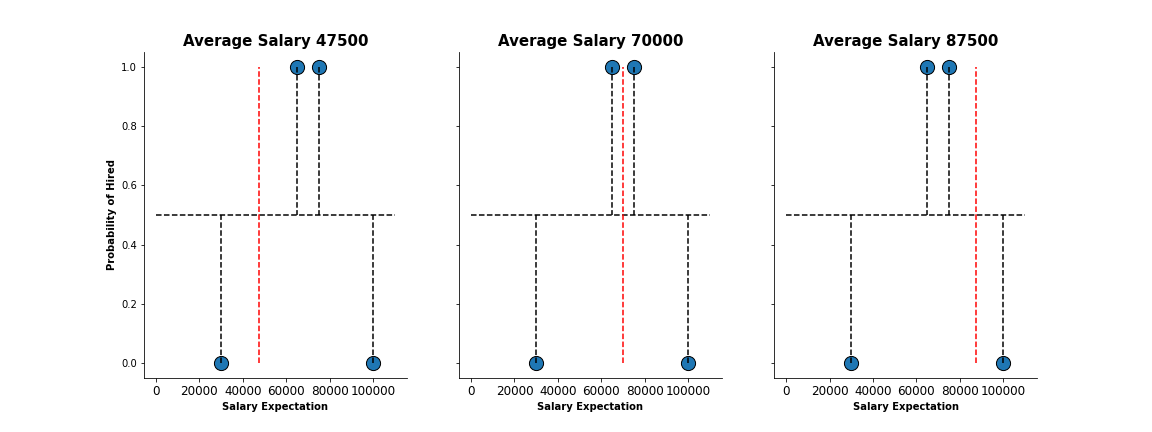

In [36]:
Image('XGBoostClassificationSimilarity.png')

___
## <center> How do we quantify the performance of clustering similar residuals compared to the Root

$$\text{Gain} = \text{Left}_\text{similarity} + \text{Right}_\text{similarity} - \text{Root}_\text{similarity}$$

___
## <center> Average Salary 47500
___
#### <center> Average Salary $\leq$ 47500
    
$$\begin{bmatrix}
      -0.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 47500$} = \frac{(-0.5)^2}{0.5 \times (1 - 0.5)}  = 1$$       
___
#### <center> Average Salary $\geq$ 47500
$$\begin{bmatrix}
    0.5 & 0.5 & -0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 47500$} = \frac{(0.5 + 0.5 + -0.5)^2}{3\times(0.5 \times (1 - 0.5))} = 0.33$$     
___  
#### <center> Gain For Average Salary 47500
$$\text{Gain} = 1 + 0.33 - 0$$
    
$$\text{Gain} = 1.33$$
___
## <center> Average Salary 70000
___
___
#### <center> Average Salary $\leq$ 70000
    
$$\begin{bmatrix}
      -0.5 & 0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 70000$} = \frac{(-0.5 + 0.5)^2}{2\times(0.5 \times (1 - 0.5))} = 0$$       
___
#### <center> Average Salary $\geq$ 70000
$$\begin{bmatrix}
    0.5 & -0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 70000$} = \frac{(0.5 + -0.5)^2}{2\times(0.5 \times (1 - 0.5))} = 0$$     
___  
#### <center> Gain For Average Salary 87500
$$\text{Gain} = 0 + 0 - 0$$
    
$$\text{Gain} = 0$$
    
___
## <center> Average Salary 87500
___
#### <center> Average Salary $\leq$ 87500
    
$$\begin{bmatrix}
      -0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 87500$} = \frac{(-0.5)^2}{0.5 \times (1 - 0.5)}  = 1$$       
___
#### <center> Average Salary $\geq$ 87500
$$\begin{bmatrix}
   -0.5& 0.5 & 0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 87500$} = \frac{(0.5 + 0.5 + -0.5)^2}{3\times(0.5 \times (1 - 0.5))} = 0.33$$     
___  
#### <center> Gain For Average Salary 87500
$$\text{Gain} = 1 + 0.33 - 0$$
    
$$\text{Gain} = 1.33$$
    
___
### <center> Largest Gain Is Average Salary $\leq$ 87500
$$\begin{array}{c|c}
   \text{Dosage} & \text{Gain}\\
  \hline
  \leq 47500  & 1.33\\ 
  \hline
  \leq 70000 & 0 \\  
  \hline
  \leq 87500 & 1.33 
 \end{array}$$  
    
#### <center> Average Salary $\leq$ 87500 is our first branch in our tree

___
## <center> Creating Internal Nodes by Clustering similar residuals into internal nodes
___

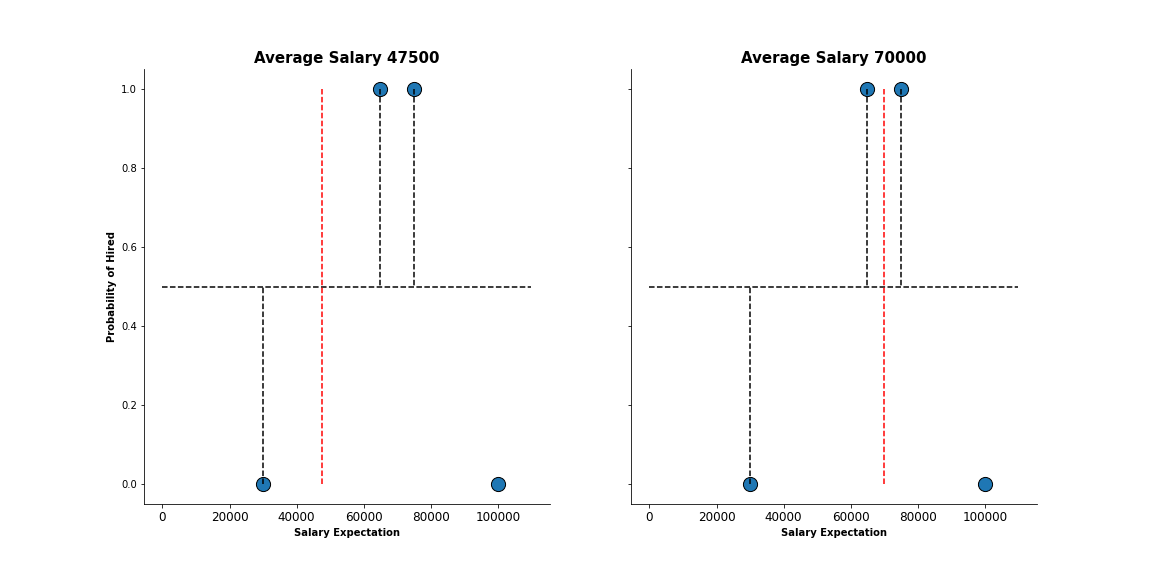

In [52]:
Image('XGBoostClassificationSimilarity2.png')

___
## <center> Average Salary 47500
___
#### <center> Average Salary $\leq$ 47500
    
$$\begin{bmatrix}
      -0.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 47500$} = \frac{(-0.5)^2}{0.5 \times (1 - 0.5)}  = 1$$       
___
#### <center> Average Salary $\geq$ 47500
$$\begin{bmatrix}
    0.5 & 0.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 47500$} = \frac{(0.5 + 0.5)^2}{2\times(0.5 \times (1 - 0.5))} = 2$$     
___  
#### <center> Gain For Average Salary 47500
$$\text{Gain} = 1 + 2 - 0.33$$
    
$$\text{Gain} = 2.67$$
___
## <center> Average Salary 70000
___
___
#### <center> Average Salary $\leq$ 70000
    
$$\begin{bmatrix}
      -0.5 & 0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 70000$} = \frac{(-0.5 + 0.5)^2}{2\times(0.5 \times (1 - 0.5))} = 0$$       
___
#### <center> Average Salary $\geq$ 70000
$$\begin{bmatrix}
    0.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 70000$} = \frac{(0.5 )^2}{(0.5 \times (1 - 0.5))} = 1$$     
___  
#### <center> Gain For Average Salary 87500
$$\text{Gain} = 0 + 1 - 0.33$$
    
$$\text{Gain} = 0.77$$

___
### <center> Largest Gain Is Average Salary $\leq$ 47500
$$\begin{array}{c|c}
   \text{Dosage} & \text{Gain}\\
  \hline
  \leq 47500  & 2.67\\ 
  \hline
  \leq 70000 & 0.77 
 \end{array}$$  
    
#### <center> Average Salary $\leq$ 47500 is our internal branch in our tree

___
### <center> XGBoost has a minimum numbers of residuals in each leaf which is calculated using **Cover**  

$$\text{Cover} =\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]$$    
    
$$\text{By Default Cover} =1$$ 

___
#### <center> Cover Average Salary $\leq$ 47500
    
$$\begin{bmatrix}
      -0.5 
     \end{bmatrix}$$

$$0.5 \times (1 - 0.5)  = 0.25$$  
    
#### <center> Since Covers default is equal to 1 this leaf would not be allowed 
    
___
#### <center> Cover Average Salary $\geq$ 47500
$$\begin{bmatrix}
    0.5 & 0.5 
     \end{bmatrix}$$

$$2\times(0.5 \times (1 - 0.5)) = 0.5$$     

#### <center> Since Covers default is equal to 1 this leaf would not be allowed    

___
## <center> Pruning XGBoost Trees
<center> XGBoost Trees are Pruned based upon its gain values
    
___
#### <center> We Start by selecting our Parameter $\gamma$ to act as our threshold value


$$ \text{Gain - $\gamma$} =
  \begin{cases}
    \text{Remove Branch}         & \quad \text{if } \text{negative }\\
    \text{Keep Branch}  & \quad \text{if } \text{positive }
  \end{cases}
$$
___
#### <center> Starting with our lowest branch and setting $\gamma$ to 2
    
$$ \text{Gain for Salary $\leq 47500$ our internal branch in our tree} = 2.67$$
___    
$$ \text{Gain - $\gamma$}$$
    
$$ \text{2.67 - 2} = 0.67$$
$$$$   
<center> Results in a positive number and we will not remove this branch or its root
    
___
#### <center> Starting with our lowest branch and setting $\gamma$ to 3
$$ \text{2.67 - 3} = -0.33$$
$$$$   
<center> Results in a negative number and we will remove this branch
    
___
$$ \text{Gain for our Root $\leq 87500$} = 1.33$$  
    
$$ \text{1.33 - 3} = -1.67$$
    
<center> Results in a negative number and we will  remove this whole tree

___
# <center> XGBoost Tree with Regularization

<center> The value of $\lambda$ controls our regularization and is intended to reduced the predictions sensitivity to individuals observations

___
#### <center> All residuals in intial leaf
    
$$\begin{bmatrix}
      -0.5 & 0.5 & 0.5 & -0.5
     \end{bmatrix}$$
    
___    
#### <center> Calculate Similary Score for Residuals
    
$$\text{Similary Score For Residuals} =\frac{(\sum{}{}\text{$Residual_i$})^2}{\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]+\lambda}$$    
     $$$$
$$\lambda = {\color{red}{1}}$$   
___
#### <center> Setting our Regularization Parameter to zero
$$\text{Similary Score For Residuals} = \frac{(-0.5 + 0.5 + 0.5 + -0.5)^2}{4\times(0.5 \times (1 - 0.5)) + {\color{red}{1}}}$$       
$$$$
$$\text{Similary Score For Residuals} = \frac{(0)^2}{4\times(0.5 \times (1 - 0.5)) + {\color{red}{1}}} = 0$$    
    


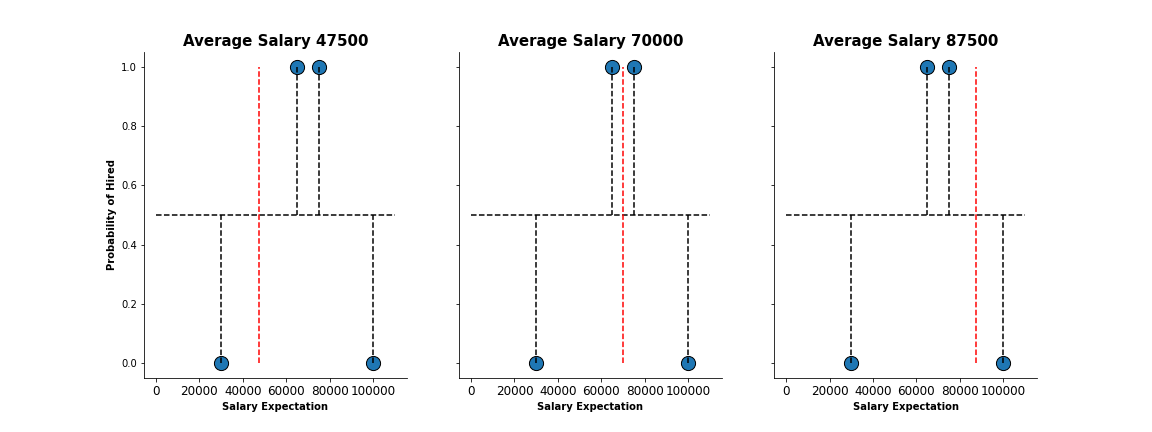

In [55]:
Image('XGBoostClassificationSimilarity.png')

___
#### <center> Average Salary $\leq$ 87500
    
$$\begin{bmatrix}
      -0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 87500$} = \frac{(-0.5)^2}{0.5 \times (1 - 0.5)+ {\color{red}{1}}} = 0.2$$       
___
#### <center> Average Salary $\geq$ 87500
$$\begin{bmatrix}
   -0.5& 0.5 & 0.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 87500$} = \frac{(0.5 + 0.5 + -0.5)^2}{3\times(0.5 \times (1 - 0.5))+ {\color{red}{1}}} = 0.143$$     
___  
#### <center> Gain For Average Salary 87500
$$\text{Gain} = 0.2 + 0.143 - 0$$
    
$$\text{Gain} = 0.343$$

___
## <center> Pruning Regularized XGBoost Trees
<center> When $\lambda$ $\geq$ 0 it is easier to prune leaves beacuase the values for gain are smaller 

___
# <center> Output values for each leaf 
<center> When $\lambda$ $\geq$ 0 it reduces the amount individual observations have on the overall predicton
 $$$$
<center> When $\lambda$ = 0 the output value of the leaf is just that leaves average 
    
___
$$\text{Output values} = \frac{\sum{}{}\text{$Residual_i$}}{\sum_{}{}[\text{Previous $Probability_i$ x (1 -Previous $Probability_i$) }]+\lambda}$$ 
___
#### <center> Top Left Leaf
$$\frac{-0.5}{0.5\times (1-0.5)} = -2$$

#### <center> Top Left Leaf Regularized
$$\frac{-0.5}{0.5\times (1-0.5)+ {\color{red}{1}}} = -0.4$$    
___
#### <center> Bottom Left Leaf 
$$\frac{0.5 +0.5}{2\times(0.5\times (1-0.5))} = 2$$

#### <center> Bottom Left Leaf Regularized
$$\frac{0.5 +0.5}{2\times(0.5\times (1-0.5))+ {\color{red}{1}}} = 0.67$$
___   
#### <center> Bottom Right Leaf
$$\frac{-0.5}{0.5\times (1-0.5)} = -2$$

#### <center> Bottom Right Leaf Regularized
$$\frac{-0.5}{0.5\times (1-0.5)+ {\color{red}{1}}} = -0.4$$  

___
#### <center> Update Prediction By Combining Leaf With New Tree
___
#### <center> Junior Data Scientist Salary Expectation DataSet
$$\begin{array}{c|c}
   \text{Salary Expectation} & \text{Hired}& \text{Prediction} & \text{Residuals} & \text{Leaf}\\
  \hline
  $30,000  & \text{No} & 0.5 & -0.5& {\color{red}{\text{Bottom Right}}}\\ 
  \hline
   $65,000 & \text{Yes}& 0.5 & 0.5& {\color{blue}{\text{Bottom Left}}}\\  
  \hline
  $75,000 & \text{Yes}& 0.5 & 0.5& {\color{blue}{\text{Bottom Left}}}\\
  \hline
  $100,000 & \text{No} & 0.5 & -0.5 & {\color{orange}{\text{Top Left}}}
 \end{array}$$  

___   
<center> Person in Orange above ended on the Top Left Leaf with a value of -2 and If we add that to our initial log(odd) prediction (leaf one) with our learning rate we have:
    
___
    
$$\text{log-odds initial prediction} = log(\frac{0.5}{1-0.5}) = 0$$
    
$$\text{Learning Rate} = 0.3$$    
___   
$$ 0 + (0.3\times-2) = -0.6$$

$$\text{New log(odds) Prediction}= -0.6$$
___
## <center> Convert New Log(odds) Prediction Into A Probability
___

$$\frac{e^{log(odds)}}{1+e^{log(odds)}} = \frac{e^{-0.6}}{1+e^{-0.6}} = 0.35$$
___

#### <center> Junior Data Scientist Salary Expectation DataSet
$$\begin{array}{c|c}
   \text{Salary Expectation} & \text{Hired}& \text{Prediction} & \text{Residuals} & \text{New Prediction}& \text{New Residuals}\\
  \hline
  $30,000  & \text{No} & 0.5 & -0.5 & 0.35 & -0.35 \\ 
  \hline
   $65,000 & \text{Yes}& 0.5 & 0.5 & 0.65 & 0.35\\  
  \hline
  $75,000 & \text{Yes}& 0.5 & 0.5 & 0.65 & 0.35 \\
  \hline
  $100,000 & \text{No} & 0.5 & -0.5 & 0.35 & -0.35
 \end{array}$$ 
___    

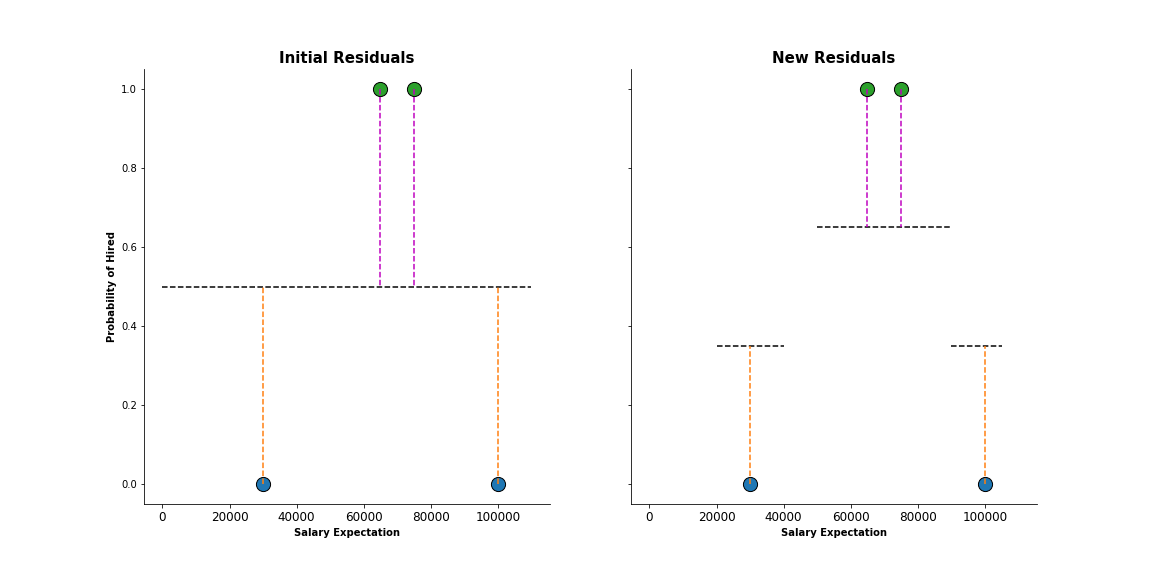

In [74]:
Image('XGBoostClassificationNewResiduals.png')

___
# <center> Build Another Tree based on New Residuals

___
# <center> Appendix

**Libraries**:
```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBRegressor, plot_tree
import xgboost as xgb
```
**Initial Prediction Plot**:
```
from matplotlib.pyplot import sca
# create two classes
x1 = [30000,100000]
y1 = [0,0]

x2 = [75000,65000]
y2 = [1,1]

# Plot points
fig,(ax2, ax1)= plt.subplots(1,2,figsize=(14,8))

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax1.scatter(x2,y2, c = 'tab:green', s = 200, edgecolor = 'black')

ax1.plot([0,110000],[0.5,0.5],'black',linestyle = '--')

ax1.plot([30000,30000],[0,0.5],'tab:orange',linestyle = '--')
ax1.plot([65000,65000],[1,0.5],'m',linestyle = '--')
ax1.plot([75000,75000],[1,0.5],'m',linestyle = '--')
ax1.plot([100000,100000],[0,0.5],'tab:orange',linestyle = '--')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Observed - Predicted',fontweight="bold", size = 15)
ax1.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax2.scatter(x2,y2, c = 'tab:green', s = 200, edgecolor = 'black')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Residuals Intuition',fontweight="bold", size = 15)
ax2.set_ylabel('Probability of Hired', fontdict=dict(weight='bold'))
ax2.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))

ax2.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostClassificationInitial.png')
```
**Similarity Plot:**
```
# create two classes
x1 = [30000,100000]
y1 = [0,0]

x2 = [75000,65000]
y2 = [1,1]

# Plot points
fig,(ax1, ax2,ax3)= plt.subplots(1,3,figsize=(16,6),sharey='all',sharex = True)

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax1.scatter(x2,y2, c = 'tab:blue', s = 200, edgecolor = 'black')

ax1.plot([0,110000],[0.5,0.5],'black',linestyle = '--')
ax1.plot([47500,47500],[0,1],'red',linestyle = '--')

ax1.plot([30000,30000],[0,0.5],'black',linestyle = '--')
ax1.plot([65000,65000],[1,0.5],'black',linestyle = '--')
ax1.plot([75000,75000],[1,0.5],'black',linestyle = '--')
ax1.plot([100000,100000],[0,0.5],'black',linestyle = '--')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Average Salary 47500',fontweight="bold", size = 15)
ax1.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax1.set_ylabel('Probability of Hired', fontdict=dict(weight='bold'))

ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax2.scatter(x2,y2, c = 'tab:blue', s = 200, edgecolor = 'black')

ax2.plot([0,110000],[0.5,0.5],'black',linestyle = '--')
ax2.plot([70000,70000],[0,1],'red',linestyle = '--')

ax2.plot([30000,30000],[0,0.5],'black',linestyle = '--')
ax2.plot([65000,65000],[1,0.5],'black',linestyle = '--')
ax2.plot([75000,75000],[1,0.5],'black',linestyle = '--')
ax2.plot([100000,100000],[0,0.5],'black',linestyle = '--')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Average Salary 70000',fontweight="bold", size = 15)
ax2.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax2.xaxis.set_tick_params(labelsize = 12)

#___________________________________________


ax3.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax3.scatter(x2,y2, c = 'tab:blue', s = 200, edgecolor = 'black')

ax3.plot([0,110000],[0.5,0.5],'black',linestyle = '--')
ax3.plot([87500,87500],[0,1],'red',linestyle = '--')

ax3.plot([30000,30000],[0,0.5],'black',linestyle = '--')
ax3.plot([65000,65000],[1,0.5],'black',linestyle = '--')
ax3.plot([75000,75000],[1,0.5],'black',linestyle = '--')
ax3.plot([100000,100000],[0,0.5],'black',linestyle = '--')
# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Providing subplots with titles
ax3.set_title('Average Salary 87500',fontweight="bold", size = 15)
ax3.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax3.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostClassificationSimilarity.png')
```
**Similarity Plot 2**:
```
#Similarity Plot:

# create two classes
x1 = [30000,100000]
y1 = [0,0]

x2 = [75000,65000]
y2 = [1,1]

# Plot points
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,8),sharey='all',sharex = True)

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax1.scatter(x2,y2, c = 'tab:blue', s = 200, edgecolor = 'black')

ax1.plot([0,110000],[0.5,0.5],'black',linestyle = '--')
ax1.plot([47500,47500],[0,1],'red',linestyle = '--')

ax1.plot([30000,30000],[0,0.5],'black',linestyle = '--')
ax1.plot([65000,65000],[1,0.5],'black',linestyle = '--')
ax1.plot([75000,75000],[1,0.5],'black',linestyle = '--')


# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Average Salary 47500',fontweight="bold", size = 15)
ax1.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax1.set_ylabel('Probability of Hired', fontdict=dict(weight='bold'))

ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax2.scatter(x2,y2, c = 'tab:blue', s = 200, edgecolor = 'black')

ax2.plot([0,110000],[0.5,0.5],'black',linestyle = '--')
ax2.plot([70000,70000],[0,1],'red',linestyle = '--')

ax2.plot([30000,30000],[0,0.5],'black',linestyle = '--')
ax2.plot([65000,65000],[1,0.5],'black',linestyle = '--')
ax2.plot([75000,75000],[1,0.5],'black',linestyle = '--')


# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Average Salary 70000',fontweight="bold", size = 15)
ax2.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax2.xaxis.set_tick_params(labelsize = 12)


fig.savefig('XGBoostClassificationSimilarity2.png')
```
**New Residuals**:
```
from matplotlib.pyplot import sca
# create two classes
x1 = [30000,100000]
y1 = [0,0]

x2 = [75000,65000]
y2 = [1,1]

# Plot points
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,8),sharey='all',sharex = True)

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax1.scatter(x2,y2, c = 'tab:green', s = 200, edgecolor = 'black')

ax1.plot([0,110000],[0.5,0.5],'black',linestyle = '--')

ax1.plot([30000,30000],[0,0.5],'tab:orange',linestyle = '--')
ax1.plot([65000,65000],[1,0.5],'m',linestyle = '--')
ax1.plot([75000,75000],[1,0.5],'m',linestyle = '--')
ax1.plot([100000,100000],[0,0.5],'tab:orange',linestyle = '--')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Initial Residuals',fontweight="bold", size = 15)
ax1.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))
ax1.set_ylabel('Probability of Hired', fontdict=dict(weight='bold'))
ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax2.scatter(x2,y2, c = 'tab:green', s = 200, edgecolor = 'black')

ax2.plot([50000,90000],[0.65,0.65],'black',linestyle = '--')
ax2.plot([20000,40000],[0.35,0.35],'black',linestyle = '--')
ax2.plot([90000,105000],[0.35,0.35],'black',linestyle = '--')

ax2.plot([30000,30000],[0,0.35],'tab:orange',linestyle = '--')
ax2.plot([65000,65000],[1,0.65],'m',linestyle = '--')
ax2.plot([75000,75000],[1,0.65],'m',linestyle = '--')
ax2.plot([100000,100000],[0,0.35],'tab:orange',linestyle = '--')


# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('New Residuals',fontweight="bold", size = 15)
ax2.set_xlabel('Salary Expectation', fontdict=dict(weight='bold'))

ax2.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostClassificationNewResiduals.png')
```